## 1. scipy.ndimage.interpolation.rotate  사용
___

#### parameters : (input, angle, axes=(1, 0), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)

1) input : ndarray

    - The input array.

2) angle : float

    - The rotation angle in degrees.

3) axes : tuple of 2 ints, optional

    - The two axes that define the plane of rotation. Default is the first two axes.

4) reshape : bool, optional

    - If reshape is true, the output shape is adapted so that the input array is contained completely in the output. Default is True.

5) output : ndarray or dtype, optional

    - The array in which to place the output, or the dtype of the returned array.

6) order : int, optional

    - The order of the spline interpolation, default is 3. The order has to be in the range 0-5.

7) mode : str, optional

    - Points outside the boundaries of the input are filled according to the given mode (‘constant’, ‘nearest’, ‘reflect’ or ‘wrap’). Default is ‘constant’.

8) cval : scalar, optional

    - Value used for points outside the boundaries of the input if mode='constant'. Default is 0.0

9) prefilter : bool, optional

    - The parameter prefilter determines if the input is pre-filtered with spline_filter before interpolation (necessary for spline interpolation of order > 1). If False, it is assumed that the input is already filtered. Default is True.

## 


In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy.ndimage.interpolation import rotate

In [4]:
ct = np.load('C://Users//Heeguen//Desktop//heeguen//Dental_panorama_2020//np_data/ct.npy', allow_pickle=True)
sample = ct[0] # sample 1개 추출

In [4]:
axial= np.transpose(sample, (2,0,1))
sagittal = sample
coronal = np.transpose(sample, (1,2,0))

print(axial.shape)
print(sagittal.shape)
print(coronal.shape)

(424, 671, 671)
(671, 671, 424)
(671, 424, 671)


In [1]:
# anatominal plane view

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(sample[ ..., 100], cmap='gray')

plt.subplot(132)
plt.imshow(np.rot90(axial[100, ...],1), cmap='gray')

plt.subplot(133)
plt.imshow(axial[100, ...], cmap='gray')
plt.show()


NameError: name 'plt' is not defined

In [7]:
axial45_f = rotate(axial, 45, reshape=False)
axial45_t = rotate(axial, 45)

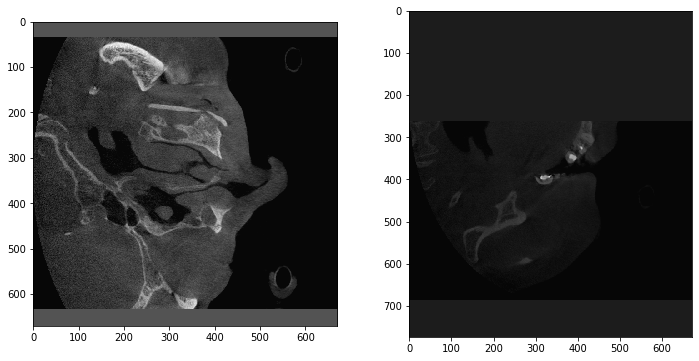

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(axial45_f[212, ...], cmap='gray')

plt.subplot(122)
plt.imshow(axial45_t[212, ...], cmap='gray')

</br>

### 3D 회전 방식에 문제가 있는거 같아 2D이미지 회전하여 3D로 합치는 테스트


In [11]:
rot_45f=[]
rot_45t=[]
for i in range(axial.shape[0]):
    tmp = axial[i]
    rot_45f.append(rotate(tmp, 45, reshape=False))
    rot_45t.append(rotate(tmp, 45))

rotf=np.array(rot_45f)
rott=np.array(rot_45t)

In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [13]:
def show(x):
    idx = x
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(rotf[idx, ...], cmap='gray')

    plt.subplot(122)
    plt.imshow(rott[idx, ...], cmap='gray')

In [14]:
interact(show, x=widgets.IntSlider(min=0, max=(rotf.shape[0]-1), step=1,value=axial.shape[0]//2))

interactive(children=(IntSlider(value=212, description='x', max=423), Output()), _dom_classes=('widget-interac…

<function __main__.show(x)>

</br>

## 2) scipy.ndimage.interpolation.rotate 
### - axes test

#### parameters : (input, angle, axes=(1, 0), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)

In [5]:
print(sample.shape)
tmp = np.transpose(sample, (2,0,1))
print(tmp.shape)

(671, 671, 424)
(424, 671, 671)


In [23]:
tmp_test = rotate(tmp, 90, axes=(1,2), reshape=False)

In [28]:
def show(x):
    idx = x
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(tmp[idx, ...], cmap='gray')

    plt.subplot(122)
    plt.imshow(tmp_test[idx, ...], cmap='gray')

In [29]:
interact(show, x=widgets.IntSlider(min=0, max=(tmp.shape[0]-1), step=1,value=tmp.shape[0]//2))

interactive(children=(IntSlider(value=212, description='x', max=423), Output()), _dom_classes=('widget-interac…

<function __main__.show(x)>

</br>

## 결과

#### 1. rotate 함수의 axes 는 rotation 시킬 array의 shape 순서

#### 2. 현재 1,2 번 축을 통해 90도 회전시킨 결과 회전은 반시계방향으로 이루어진다.

#### 3. 다른 각도로도 확인해 보자

</br>


In [36]:
tmp_test_45 = rotate(tmp, 45, axes=(1,2), reshape=False)

In [37]:
def show45(x):
    idx = x
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(tmp[idx, ...], cmap='gray')

    plt.subplot(122)
    plt.imshow(tmp_test_45[idx, ...], cmap='gray')

In [38]:
interact(show45, x=widgets.IntSlider(min=0, max=(tmp.shape[0]-1), step=1,value=tmp.shape[0]//2))

interactive(children=(IntSlider(value=212, description='x', max=423), Output()), _dom_classes=('widget-interac…

<function __main__.show45(x)>

</br>

## 결과

#### 1. 회전시 남은 pixel들이 문제 발생..

#### 2. array를 gray scale화 하기?

</br>

In [39]:
tmp.shape

(424, 671, 671)

In [42]:
def show_hist(x):
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(tmp[x], cmap='gray')
    plt.subplot(122)
    plt.hist(tmp[x], range=(tmp[x].min(), tmp[x].max()))
    plt.show()

In [45]:
interact(show_hist, x=widgets.IntSlider(min=0, max=200, step=1,value=100)) # range 0~200 인 이유 : 어짜피 사용할 ROI가 0~200 안에 존재.

interactive(children=(IntSlider(value=100, description='x', max=200), Output()), _dom_classes=('widget-interac…

<function __main__.show_hist(x)>

In [6]:
tmp_ = tmp+1000

In [7]:
tmp.min()

-1000.0

In [71]:
gray_tmp = np.zeros((tmp.shape))
limit = 3000
for s in range(tmp_.shape[0]):
    for w in range(tmp_.shape[1]):
        for h in range(tmp_.shape[2]):
            if tmp_[s,w,h]>limit:
                gray_tmp[s,w,h] = 255
            else:
                gray_tmp[s,w,h] = (tmp_[s,w,h]//limit)*255
            

In [72]:
print(gray_tmp.max())
print(gray_tmp.min())

255.0
0.0


In [73]:
def show_g(x):
    idx = x
    plt.figure(figsize=(9,9))
    plt.imshow(gray_tmp[idx, ...], cmap='gray')

In [74]:
interact(show_g, x=widgets.IntSlider(min=0, max=(gray_tmp.shape[0]-1), step=1,value=gray_tmp.shape[0]//2))

interactive(children=(IntSlider(value=212, description='x', max=423), Output()), _dom_classes=('widget-interac…

<function __main__.show_g(x)>

</br>

### - gray scale은 차후 조금더 생각해 보아야 할 것 같다.

### - image 픽셀 자체의 값이 의미가 있으므로 gray scale 화 하는 것은 의미가 없다..

</br>

### 다시 회전으로 돌아와 몇가지 테스트해보자

#### 1. 이전 테스트 결과로 slice, width, height 이 세축을 기준으로 회전함을 알 수 있다. 이는 즉 중심을 기준으로 반시계 방향으로 회전하는 것과 같음을 의미함.

#### 2. 회전시 pixel width 와 height 변화 여부 확인 

In [8]:
tmp_test_45 = rotate(tmp, 45, axes=(1,2), reshape=False)

KeyboardInterrupt: 

In [ ]:
print(tmp.shape)
print(tmp_test_45.shape)

#### -> 회전시 pixel width 와 height 변화 없음.

#### -> 또한 이들을 회전시키고 나서, 이미지가 없었던 공간을 0으로 채워준다. 그렇게 때문에 밑의 회전된 이미지 이외의 영역이 회색(이미지의 검은 부분의 값은 대략 '-1800')

#### parameter : cval

- Value used for points outside the boundaries of the input if mode='constant'. Default is 0.0

</br>

In [81]:
def show45(x):
    idx = x
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(tmp[idx, ...], cmap='gray')

    plt.subplot(122)
    plt.imshow(tmp_test_45[idx, ...], cmap='gray')

In [82]:
interact(show45, x=widgets.IntSlider(min=0, max=(tmp.shape[0]-1), step=1,value=tmp.shape[0]//2))

interactive(children=(IntSlider(value=212, description='x', max=423), Output()), _dom_classes=('widget-interac…

<function __main__.show45(x)>

</br>

## 2020-03-29

## 회전각 찾기 

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.interpolation import rotate

In [2]:
import cv2

In [4]:
ct = np.load('C://Users//Heeguen//Desktop//heeguen//Dental_panorama_2020//np_data/ct.npy', allow_pickle=True)
sample = ct[0]

In [5]:
tmp = np.transpose(sample, (2,0,1))
tmp.shape

(424, 671, 671)

In [9]:
tmp_2d = tmp[50] # sample

In [10]:
tmp_2d.shape

(671, 671)

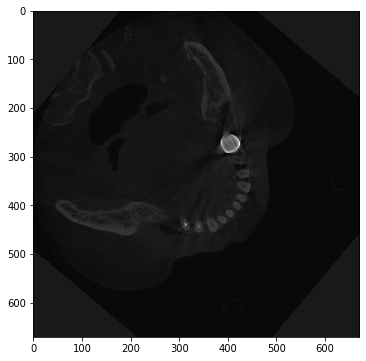

In [20]:
angle = -40
tmp_r = rotate(tmp_2d, angle, axes=(1,0), reshape=False)

plt.figure(figsize=(6,6))
plt.imshow(tmp_r, cmap='gray')

</br> 

## 보간해 주기 위해 0~1 사이 값을 각 픽셀에 곱해주려고 하였는데, 픽셀값의 범위가 -1000 ~ 25000 까지 여서 이를 mapping 해주어야 곱셈 보간이 가능

### - 이를 위해 픽셀값을 0~ 3000으로 mapping

In [22]:
tmp_ = np.zeros((tmp.shape))
tmp_1000 = tmp + 1000

for s in range(tmp_1000.shape[0]):
    for w in range(tmp_1000.shape[1]):
        for h in range(tmp_1000.shape[2]):
            if tmp_1000[s,w,h] > 3000:
                tmp_[s,w,h] = 3000
            else:
                tmp_[s,w,h] = tmp_1000[s,w,h]


In [23]:
print(tmp_.min())
print(tmp_.max())

0.0
3000.0


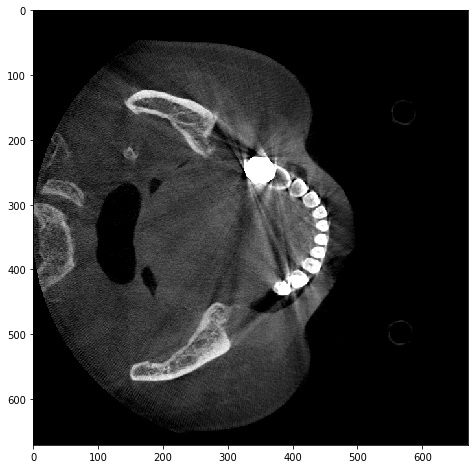

In [36]:
plt.figure(figsize=(8,8))
plt.imshow(tmp_[63], cmap='gray')

In [50]:
tot = []

# angles = np.arange(-50, 220, 5) # 54 angles -5~220 (step = 5)
angles = np.arange(-50, 220, 3)
for angle in angles:
    print(angle)
    tmp_rot = rotate(tmp_, angle, axes=(1,2), reshape=False) # rotate 3d 
    
    min_ = 320
    max_ = 325

    test = np.zeros((tmp_rot.shape[0], tmp_rot.shape[1], (max_ - min_)))
    for s in range(tmp_rot.shape[0]):
        for w in range(tmp_rot.shape[1]):
            for h in range(min_,max_):
                test[s,w,h-min_] = tmp_rot[s,w,h]*(1-(w/tmp_rot.shape[1])) # 잘라올때 interpolation 추가.. detector에 가까 울수록 더 값이 커지도록 (1-(w/tmp.shape[1])) 곱해줌.
                
    tot.append(test)    
    tot_ = tot[0]
    for i in range(len(tot)-1):  # range(13)
        tot_ = np.concatenate((tot_, tot[i+1]),axis=2) 

-50
-47
-44
-41
-38
-35
-32
-29
-26
-23
-20
-17
-14
-11
-8
-5
-2
1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217


In [51]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def show45(x):
    idx = x
    plt.figure(figsize=(18,9))
    plt.subplot(121)
    plt.imshow(np.rot90(tmp_[idx, ...]), cmap='gray')
    
    plt.subplot(122) 
    plt.imshow(tot_[idx, ...], cmap='gray')
    
#     plt.subplot(122) 
#     plt.imshow(test[:, idx, :], cmap='gray')

In [52]:
interact(show45, x=widgets.IntSlider(min=0, max=(test.shape[0]-1), step=1,value=test.shape[0]//2))

interactive(children=(IntSlider(value=212, description='x', max=423), Output()), _dom_classes=('widget-interac…

<function __main__.show45(x)>

</br>

## 2020 / 03 / 30

## 필요 없는 부분제거하고 projection test -> 메모리 사용량 및 연산 시간 단축 위해 -> 추후 다시 사용

In [64]:
tot1 = []

# angles = np.arange(-50, 220, 5) # 54 angles -5~220 (step = 5)
angles = np.arange(-50, 240, 3)
for angle in angles:
    print(angle)
    tmp_rot = rotate(tmp_, angle, axes=(1,2), reshape=False) # rotate 3d 
    
    min_ = 320
    max_ = 325

    test = np.zeros((200, 300, (max_ - min_)))
    for s in range(200): # slice range 도 0~200 으로 제한하고 해보자
        for w in range(300): # range 를 0~ 300 으로 제한해보자.
            for h in range(min_,max_):
                test[s,w,h-min_] = tmp_rot[s,w,h]*(1-(w/tmp_rot.shape[1])) # 잘라올때 interpolation 추가.. detector에 가까 울수록 더 값이 커지도록 (1-(w/tmp.shape[1])) 곱해줌.
                
    tot1.append(test)    
    tot_1 = tot1[0]
    for i in range(len(tot1)-1):  # range(13)
        tot_1 = np.concatenate((tot_1, tot1[i+1]),axis=2) 

-50
-47
-44
-41
-38
-35
-32
-29
-26
-23
-20
-17
-14
-11
-8
-5
-2
1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238


In [65]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def show45(x):
    idx = x
    plt.figure(figsize=(18,9))
    plt.subplot(121)
    plt.imshow(np.rot90(tmp_[idx, ...]), cmap='gray')
    
    plt.subplot(122) 
    plt.imshow(tot_1[idx, ...], cmap='gray')
    
#     plt.subplot(122) 
#     plt.imshow(test[:, idx, :], cmap='gray')

In [66]:
tot_1.shape

(200, 300, 485)

In [67]:
interact(show45, x=widgets.IntSlider(min=0, max=(tot_1.shape[0]-1), step=1,value=tot_1.shape[0]//2))

interactive(children=(IntSlider(value=100, description='x', max=199), Output()), _dom_classes=('widget-interac…

<function __main__.show45(x)>

In [68]:
tot_t = np.transpose(tot_1, (1,0,2))

In [87]:
def show(x):
    idx = x
    plt.figure(figsize=(18,9))
    plt.subplot(121)
    plt.imshow(np.flipud(tot_t[idx, ...]), cmap='gray')
    
interact(show, x=widgets.IntSlider(min=0, max=(tot_t.shape[0]-1), step=1,value=tot_t.shape[0]//2))

interactive(children=(IntSlider(value=150, description='x', max=299), Output()), _dom_classes=('widget-interac…

<function __main__.show(x)>

In [ ]:
tot_f1 = np.zeros((200, 485))
tot_f2 = np.zeros((200, 485))

for s in range(tot_t.shape[0]):
    tot_f1 += tot_t[s, ...]
    tot_f2 += tot_t[s, ...]*(1-((1/(2*tot_t.shape[0])*s)))
    
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(np.flipud(tot_f1), cmap='gray')

plt.subplot(212)
plt.imshow(np.flipud(tot_f2), cmap='gray')